# Initial Import

In [ ]:
!pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn.ensemble as sk_ensemble
import sklearn.model_selection as sk_model_select
from sklearn.metrics import accuracy_score
from google.colab import drive
import gplearn as g
drive.mount('/content/drive')

Mounted at /content/drive


# Random Forest Practice


In [ ]:
# cleaned_all_features = pd.read_csv('/content/drive/MyDrive/Le_Data/CICIDS2017_Cleaned_All_Features.csv')
filtered_balanced = pd.read_csv('/content/drive/MyDrive/Le_Data/CICIDS2017_RFE_binary_multiclass_balanced.csv')
# filtered_unbalanced = pd.read_csv('/content/drive/MyDrive/Le_Data/CICIDS2017_RFE_binary_multiclass_imbalanced.csv')
# filtered_balanced['Label']

In [ ]:
# cleaned_all_features_labels = cleaned_all_features.pop('Label')
# cleaned_all_features_binary = cleaned_all_features.pop('BENIGN')
# 
filtered_balanced_labels = filtered_balanced.pop('Label')
filtered_balanced_binary = filtered_balanced.pop('BENIGN')

# filtered_unbalanced_labels = filtered_unbalanced.pop('Label')
# filtered_unbalanced_binary = filtered_unbalanced.pop('BENIGN')

In [ ]:
### HYPERPARAMS AND FOREST
n_estimators = 100
max_depth = 45
random_forest = sk_ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, verbose=1)

In [ ]:
x_train, x_test, y_train, y_test = sk_model_select.train_test_split(filtered_balanced, filtered_balanced_labels, test_size=0.2, random_state=42)
### Fit, predict, check accuracy
### BALANCED
random_forest.fit(x_train, y_train)
prediction_score = random_forest.score(x_test, y_test)
prediction_score

# Multiclass test 25 depth : 0.9983474478195161
# Multiclass test 40 depth : 0.9985618881642545
# Multiclass test 50 depth : 0.9985533786267649

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
x_train, x_test, y_train, y_test = sk_model_select.train_test_split(filtered_unbalanced, filtered_unbalanced_binary, test_size=0.2, random_state=42)

### UNBALANCED
random_forest.fit(x_train, y_train)
prediction_score = random_forest.score(x_test, y_test)
prediction_score

# Test accuracy 10 depth, 0.9969641568949178
# Test accuracy 25 depth, 0.9989709605782423

In [ ]:
x_train, x_test, y_train, y_test = sk_model_select.train_test_split(cleaned_all_features, cleaned_all_features_labels, test_size=0.2, random_state=42)

### ALL FEATURES
random_forest.fit(x_train, y_train)
prediction_score = random_forest.score(x_test, y_test)
prediction_score

# Test accuracy, 0.9989409027257168
# Multiclass test : 0.9986650777260704

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 24.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.9s finished


0.9986650777260704

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, random_forest.predict(x_test))

# Full conf matrix for cleaned all features (no hyperparams) tn=111020, fn=301, tp=453957, fp=298  => falsealarms = 0.0027      missed = 0.000662619
# Full conf matrix for unbalanced dataset   (maxdepth 10   ) tn=110188, fn=418, tp=453671, fp=1299 => falsealarms = 0.011651583 missed = 0.000920524
# Full conf matrix for unbalanced dataset   (maxdepth 25   ) tn=111211, fn=306, tp=453783, fp=276  => falsealarms = 0.002475625 missed = 0.000673877
# False alarm rate : fp / (fp + tn)
# Missed detections: fn / (fn + tp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.5s finished


array([[111211,    276],
       [   306, 453783]])

# GP Failed attempt


In [ ]:
from sklearn.utils import gen_even_slices
# Initialization of a Population of GP trees
from random import random, randint, seed
from statistics import mean
from copy import deepcopy

population_size  = 500     # population size, from books, must be at least 500
minimum_depth    = 3      # minimal initial random tree depth
maximum_depth    = 10     # maximal initial random tree depth
gen_its          = 250    # maximal number of generations to run evolution, also known as run size, 10-50
tournament_size  = 5      # size of tournament for tournament selection
xo_rate          = 0.8   # crossover rate 
mutation_prob    = 0.25   # per-node mutation probability 
num_classes = 10

In [ ]:
from sympy import symbols

In [ ]:
def add(x, y): return int(x + y)
def sub(x, y): return int(x - y)
def mul(x, y): return int(x * y)
def Pdiv(x, y):           # Protected Division Operator
  if x == 0 or y == 0:
    return 1
  else:
    return int(x/y)

function_set = [add, sub, mul, Pdiv]  # Branches
terminal_set = [] # Leaves
# Terminal set is the set of inputs to the GP which can be expresexternal inputs, constants, functions with no args, 
#? So maybe we have to add in external inputs such as class variable, x_train data, y_train data?
for i in range(0, 30):
  if i <= num_classes:
    terminal_set.append(symbols('c{}'.format(i)))  # Saw this somewhere, not sure about this X thing, but the other coefficients make sense
  else: 
    terminal_set.append(randint(0,10.0))  # This random range was defined in literature
terminal_set[0:15]

[c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, 8, 6, 5, 3]

In [ ]:
def init_pop(number_bits, size):
    
    #taking samples over the distributtion
    #such that no. of 0 almost= no. of 1
    
    tot = int(2**number_bits)
    u = tot // size
    l = 1
    pop = []
    for i in range(size):
        p =[]
        num = randint(l,u)
        p = conver_bin(num)
        p = ([0]*(number_bits-len(p))) + p
        l = u+1
        u = (i+2) * (tot//size)
        pop.append(p)
    return pop

In [ ]:
def battle(p1, p2)  # the battle funciton 
  if p1 > p2: # Checks if p1's classification score is higher than p2
    return p1
  else:
    return p2

In [ ]:
def selection(tournament_size, gen):  # We will battle 5 contestants and one will be the best for breeding with the next winner
  p = {}
  for i in range(0, tournament_size):
    temp = gen[randint(0, population_size)]   # Grab a generation member at random for battle 
    while temp in p:    # While the same member was picked in p already, pick another and replace temp member
      temp = gen[randint(0, population_size)]
    p[i] = temp  # For index i put member there
  
  # Now we have our 5 battling participants form 0->4 indexed
  # Battles Begins [FFVII] theme commences
  # have p0 battle p1, p2 battle p3, and the two winners battle eachother and the final winner battles p4
  winner1 = battle(p0, p1)
  winner2 = battle(p2, p3)
  semi_final = battle(winner1, winner2)
  final = battle(semi_final, p4)
  return final

In [ ]:
def sexy_time():  # crossover function
  parental_figure1 = selection(tournament_size, gen)
  parental_figure2 = selection(tournament_size, gen)
  while parental_figure1 == parental_figure2:
    parental_figure2 = selection(tournament_size, gen)
  # We need to exchange subtrees between the two after this statement
  # suggested from literature to choose only one of the offspring so maybe have a tournament between the two
  child1 =[]
  child2=[]
  winner_of_the_womb = battle(child1, child2)
  return winner_of_the_womb

Fitness functions determine the n-class abaility. If we can makje a fitness function which can classify different attacks then we can use this as the fitness metric.

In [ ]:
def fitness():  # The ability to identify the correct attacks in the dataset
  # How tf are we going to do this? IDK lol
  # We can probably input the test x and see if the y test is close to the predicted?

In [ ]:
!pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gplearn import genetic as g
import gplearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn.ensemble as sk_ensemble
import sklearn.model_selection as sk_model_select
from sklearn.metrics import accuracy_score
from google.colab import drive
import gplearn as gp

#Using GPlearn Failed Attempt


In [ ]:

''' mapping = {
    'BENIGN': 0,
    'DDoS': 1,
    'PortScan': 2,
    'Bot': 3,
    'Infiltration': 4,
    'Brute Force': 5,
    'XSS': 6,
    'Sql Injection': 7,
    'FTP-Patator': 8,
    'SSH-Patator': 9,
    'DoS slowloris': 10,
    'DoS Slowhttptest': 11,
    'DoS Hulk': 12,
    'DoS GoldenEye': 13,
    'Heartbleed': 14
}

def encode_test(y):
  ### TRY THIS, COULD PROBABLY WORK
  y.replace(mapping)
  return y

def encode(y):
    for i in range(0, len(y)):
        if y[i] == 'BENIGN':
            y[i] = 0
        elif y[i] == 'DDoS':
            y[i] = 1
        elif y[i] == 'PortScan':
            y[i] = 2
        elif y[i] == 'Bot':
            y[i] = 3
        elif y[i] == 'Infiltration':
            y[i] = 4
        elif y[i] == 'Brute Force':
            y[i] = 5
        elif y[i] == 'XSS':
            y[i] = 6
        elif y[i] == 'Sql Injection':
            y[i] = 7
        elif y[i] == 'FTP-Patator':
            y[i] = 8
        elif y[i] == 'SSH-Patator':
            y[i] = 9
        elif y[i] == 'DoS slowloris':
            y[i] = 10
        elif y[i] == 'DoS Slowhttptest':
            y[i] = 11
        elif y[i] == 'DoS Hulk':
            y[i] = 12
        elif y[i] == 'DoS GoldenEye':
            y[i] = 13
        elif y[i] == 'Heartbleed':
            y[i] = 14
        else:
            exit('There was no class found')
    return y'''

net_data = pd.read_csv('/content/drive/MyDrive/Le_Data/CICIDS2017_RFE_binary_multiclass_balanced.csv')
#print(net_data.head())
y = net_data['Label']
print(y.head())
others = {}     # Stores the types of attacks
for classes in y:
    if classes in others.keys():
        others[classes] = others[classes] +1
    else:
        others[classes] = 1
print(others)
num_classes = len(others.keys())

ParserError: ignored

In [ ]:
classifier = g.SymbolicRegressor(population_size=7500,
                           generations=12, stopping_criteria=0.01,
                           p_crossover=0.65, p_subtree_mutation=0.2,
                           p_hoist_mutation=0.05, p_point_mutation=0.09,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=40)

In [ ]:

y = pd.read_csv('/content/drive/MyDrive/Le_Data/CICIDS2017_multi_encoded_y.csv')

x = net_data.drop(axis= 0, columns= ['Label', 'BENIGN'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.head())
print(y_test.head())
y_train.drop(columns= 'Unnamed: 0', inplace=True)
y_test.drop(columns= 'Unnamed: 0', inplace=True)


         Unnamed: 0  Label
2028723     2028723      0
1546790     1546790      0
810759       810759      0
1234644     1234644      0
1214009     1214009      0
         Unnamed: 0  Label
1615934     1615934      0
2830586     2830586     13
1957064     1957064      0
699720       699720      0
1295299     1295299      0


In [ ]:
y_train = np.transpose(np.array(y_train))
y_test = np.transpose(np.array(y_test))

In [ ]:
y_train = y_train[0,:]
y_test = y_test[0,:]

In [ ]:
classifier.fit(np.array(X_train), y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.98      5.75112e+61       31          1.50744          1.50146    493.49m
   1     9.12      2.79626e+42        5          1.32692          1.32722    265.83m
   2     4.66      8.23201e+26        5          1.32492          1.34516    202.23m
   3     3.46      9.54623e+28        5          1.32522          1.34247    165.57m
   4     4.02      4.83587e+35        5          1.32434          1.35038    157.84m
   5     5.08      6.34334e+28        9          1.12865          1.13987    140.81m
   6     5.16       2.1366e+42        9          1.12845           1.1417    117.78m
   7     5.44      1.94257e+24        9          1.07736          1.08034     96.29m
   8     6.16      6.48749e+39        9          1.07647          1.08834  

SymbolicRegressor(generations=12, max_samples=0.9, p_crossover=0.65,
                  p_hoist_mutation=0.05, p_point_mutation=0.09,
                  p_subtree_mutation=0.2, parsimony_coefficient=0.01,
                  population_size=7500, random_state=40, stopping_criteria=0.01,
                  verbose=1)

In [ ]:
y_gp = classifier.predict(np.array(X_test))

NameError: ignored

In [ ]:
score_gp = classifier.score(X_test, y_test)

In [ ]:
lemon2 = pd.read_csv('lemon2(2).csv')

NameError: ignored

In [ ]:
print(score_gp)

0.19765089888922127


In [ ]:
y_anal = pd.DataFrame(y_test)

In [ ]:
y_malicious_test = y_anal[y_anal[0]!=0]
y_malicious_test

,0
1,13
19,2
22,1
27,12
28,14
...,...
587551,2
587553,12
587556,2
587560,9


In [ ]:
lemon2.drop(columns= 'Unnamed: 0', inplace= True)

In [ ]:
malicious_lemon = pd.DataFrame()

In [ ]:
for i in y_malicious_test.index:
  malicious_lemon[i] = lemon2.iloc[i]

<ipython-input-13-ed018e08eef7>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  malicious_lemon[i] = lemon2.iloc[i]


In [ ]:
malicious_lemon = malicious_lemon.transpose()

In [ ]:
class1 = pd.DataFrame()

In [ ]:
class1 = y_malicious_test.loc[y_malicious_test[0] == 1]
class1[1] = lemon2
class1

<ipython-input-51-6f12b94f4982>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class1[1] = lemon2


,0,1
22,1,0.152114
58,1,0.000000
83,1,0.157689
88,1,0.370367
92,1,0.440806
...,...,...
587486,1,0.407330
587508,1,0.289313
587524,1,0.759344
587539,1,0.000000


In [ ]:
class2 = y_malicious_test.loc[y_malicious_test[0] == 2]
class2[1] = lemon2
class2

<ipython-input-56-8081fd233ce3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class2[1] = lemon2


,0,1
19,2,1.0
52,2,1.0
102,2,1.0
112,2,1.0
115,2,1.0
...,...,...
587491,2,1.0
587514,2,1.0
587536,2,1.0
587551,2,1.0


In [ ]:
class3 = y_malicious_test.loc[y_malicious_test[0] == 3]
class3[1] = lemon2
class3

<ipython-input-57-17275c5b4faa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class3[1] = lemon2


,0,1
42,3,4.794005e-02
310,3,2.720041e-01
659,3,4.064334e-09
1742,3,3.987737e-11
1945,3,1.000000e+00
...,...,...
585944,3,2.451947e-05
586020,3,0.000000e+00
586517,3,4.054139e-10
587014,3,0.000000e+00


In [ ]:
class4 = y_malicious_test.loc[y_malicious_test[0] == 4]
class4[1] = lemon2
class4

<ipython-input-58-98f7fd5594c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class4[1] = lemon2


,0,1
536,4,0.000677
844,4,0.000552
908,4,13.598015
922,4,0.001284
1005,4,0.006447
...,...,...
586826,4,0.000809
586885,4,9.283755
587032,4,0.002581
587267,4,20.281625


In [ ]:
class5 = y_malicious_test.loc[y_malicious_test[0] == 5]
class5[1] = lemon2
class5

<ipython-input-59-58252b42e59c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class5[1] = lemon2


,0,1
175,5,0.000000
220,5,0.000000
270,5,0.000000
287,5,0.000000
951,5,0.006248
...,...,...
586779,5,0.000000
587066,5,0.000601
587146,5,0.000000
587189,5,0.000024


In [ ]:
class6 = y_malicious_test.loc[y_malicious_test[0] == 6]
class6[1] = lemon2
class6

<ipython-input-60-0d30c1c583f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class6[1] = lemon2


,0,1
84,6,6.389467e-08
334,6,0.000000e+00
359,6,2.025529e-06
742,6,2.282923e-05
890,6,0.000000e+00
...,...,...
585910,6,0.000000e+00
585984,6,0.000000e+00
586340,6,3.834675e-06
586559,6,0.000000e+00


In [ ]:
class7 = y_malicious_test.loc[y_malicious_test[0] == 6]
class7[1] = lemon2
class7

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
init="random",
n_clusters=15,
n_init=50,
max_iter=100,
random_state=0
)

In [ ]:
kmeans.fit(malicious_lemon)

KMeans(init='random', max_iter=100, n_clusters=15, n_init=50, random_state=0)

In [ ]:
wtf = pd.DataFrame(kmeans.labels_[:])

In [ ]:
final = y_malicious_test
final[1] = wtf
final

<ipython-input-107-eb410eaf32ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[1] = wtf


,0,1
1,13,8.0
19,2,7.0
22,1,5.0
27,12,8.0
28,14,8.0
...,...,...
587551,2,NaN
587553,12,NaN
587556,2,NaN
587560,9,NaN


In [ ]:
final.to_csv('wtf.csv')

# Real GP

In [ ]:
!pip install gplearn
import os
import pandas as pd
import numpy as np
import sklearn.ensemble as sk_ensemble
import sklearn.model_selection as sk_model_select
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import numpy as np
import sklearn.ensemble as sk_ensemble
import sklearn.model_selection as sk_model_select
from sklearn.metrics import accuracy_score
from google.colab import drive
import gplearn as g
from gplearn import genetic as g
import gplearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
net_data = pd.read_csv('/content/drive/MyDrive/Le_Data/CICIDS2017_BENIGN_redo.csv')

In [ ]:
attacks = net_data.loc[net_data['Label'] != 'BENIGN']
attacks
benign = net_data.loc[net_data['Label'] == 'BENIGN']
benign
print("Size of Benign: {}, Size of Attacks: {}".format(len(benign), len(attacks)))

Size of Benign: 2271320, Size of Attacks: 666556


In [ ]:
b_balanced = benign[0:120200]
b_balanced
attack_and_benign_balanced = pd.concat([attacks, b_balanced])
attack_and_benign_balanced

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,...,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Max,Idle Min,Label,BENIGN
18871,18871,80,1293792,3,7,26,11607,20,8.666667,10.263203,...,7,11607,8192,229,2,20,0,0,DDoS,1
18872,18872,80,4421382,4,0,24,0,6,6.000000,0.000000,...,0,0,256,-1,3,20,0,0,DDoS,1
18873,18873,80,1083538,3,6,26,11601,20,8.666667,10.263203,...,6,11601,8192,229,2,20,0,0,DDoS,1
18874,18874,80,80034360,8,4,56,11601,20,7.000000,5.656854,...,4,11601,256,229,6,20,70600000,8072664,DDoS,1
18875,18875,80,642654,3,6,26,11607,20,8.666667,10.263203,...,6,11607,8192,229,2,20,0,0,DDoS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248227,248227,80,23712,1,1,6,6,6,6.000000,0.000000,...,1,6,266,65535,0,20,0,0,BENIGN,0
248228,248228,53692,4,3,0,43,0,31,14.333333,14.433757,...,0,0,62,-1,2,20,0,0,BENIGN,0
248229,248229,443,184907,7,8,1122,5611,517,160.285714,229.475281,...,8,5611,8192,114,6,20,0,0,BENIGN,0
248230,248230,53694,4,3,0,43,0,31,14.333333,14.433757,...,0,0,62,-1,2,20,0,0,BENIGN,0


In [ ]:
a_b_shuffle = attack_and_benign_balanced.sample(frac=1)
a_b_shuffle

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,...,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Max,Idle Min,Label,BENIGN
2414023,2414023,80,86272743,6,8,355,11595,343,59.166667,139.080432,...,8,11595,0,235,2,20,85300000,85300000,DoS Hulk,1
110773,110773,53,23983,4,2,184,254,46,46.000000,0.000000,...,2,254,-1,-1,3,20,0,0,BENIGN,0
2263016,2263016,80,68379606,7,6,327,11595,327,46.714286,123.594383,...,6,11595,274,235,1,32,68200000,68200000,DoS Hulk,1
198981,198981,56246,3,2,0,12,0,6,6.000000,0.000000,...,0,0,361,-1,1,20,0,0,BENIGN,0
340144,340144,1301,24,1,1,2,6,2,2.000000,0.000000,...,1,6,1024,0,0,24,0,0,PortScan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937623,2937623,444,115370657,2715,1990,15434,7701729,5477,6.662930,134.745644,...,1837,7711781,698,245,118,32,0,0,Heartbleed,1
246710,246710,80,5231972,4,4,421,545,409,105.250000,202.519752,...,4,545,8192,60,3,20,0,0,BENIGN,0
338994,338994,515,13,1,1,2,6,2,2.000000,0.000000,...,1,6,1024,0,0,24,0,0,PortScan,1
2906836,2906836,80,5398919,3,1,0,0,0,0.118148,0.055491,...,1,140,29200,28954,0,32,0,0,XSS,1


In [ ]:
x = a_b_shuffle.drop(axis= 0, columns= ['BENIGN', 'Unnamed: 0'])
x

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Max,Idle Min,Label
2414023,80,86272743,6,8,355,11595,343,59.166667,139.080432,5792,...,355,8,11595,0,235,2,20,85300000,85300000,DoS Hulk
110773,53,23983,4,2,184,254,46,46.000000,0.000000,127,...,184,2,254,-1,-1,3,20,0,0,BENIGN
2263016,80,68379606,7,6,327,11595,327,46.714286,123.594383,7240,...,327,6,11595,274,235,1,32,68200000,68200000,DoS Hulk
198981,56246,3,2,0,12,0,6,6.000000,0.000000,0,...,12,0,0,361,-1,1,20,0,0,BENIGN
340144,1301,24,1,1,2,6,2,2.000000,0.000000,6,...,2,1,6,1024,0,0,24,0,0,PortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937623,444,115370657,2715,1990,15434,7701729,5477,6.662930,134.745644,14649,...,13473,1837,7711781,698,245,118,32,0,0,Heartbleed
246710,80,5231972,4,4,421,545,409,105.250000,202.519752,533,...,421,4,545,8192,60,3,20,0,0,BENIGN
338994,515,13,1,1,2,6,2,2.000000,0.000000,6,...,2,1,6,1024,0,0,24,0,0,PortScan
2906836,80,5398919,3,1,0,0,0,0.118148,0.055491,0,...,258,1,140,29200,28954,0,32,0,0,XSS


In [ ]:
y = a_b_shuffle['BENIGN']
y

2414023    1
110773     0
2263016    1
198981     0
340144     1
          ..
2937623    1
246710     0
338994     1
2906836    1
437384     1
Name: BENIGN, Length: 786756, dtype: int64

In [ ]:
x_train, y_train = x[0:int(len(x)*.6)], y[0:int(len(y)*.6)]
x_test, y_test = x[int(len(x)*.6):], y[int(len(y)*.6):]

In [ ]:
others_train = {}
for classes in x_train['Label']:
    if classes in others_train.keys():
        others_train[classes] = others_train[classes] +1
    else:
        others_train[classes] = 1
others_train

{'DoS Hulk': 137589,
 'BENIGN': 72322,
 'PortScan': 95390,
 'XSS': 6429,
 'DoS GoldenEye': 12110,
 'DDoS': 77064,
 'FTP-Patator': 10823,
 'DoS Slowhttptest': 9322,
 'DoS slowloris': 9428,
 'Infiltration': 6073,
 'Bot': 7215,
 'SSH-Patator': 9414,
 'Heartbleed': 5997,
 'Brute Force': 6881,
 'Sql Injection': 5996}

In [ ]:
others_test = {}
for classes in x_test['Label']:
    if classes in others_test.keys():
        others_test[classes] = others_test[classes] +1
    else:
        others_test[classes] = 1
others_test

{'DoS Slowhttptest': 6177,
 'DoS Hulk': 92535,
 'BENIGN': 47878,
 'PortScan': 63414,
 'DDoS': 50961,
 'DoS GoldenEye': 8183,
 'Infiltration': 3963,
 'Bot': 4741,
 'SSH-Patator': 6483,
 'FTP-Patator': 7112,
 'Sql Injection': 4025,
 'DoS slowloris': 6368,
 'XSS': 4223,
 'Heartbleed': 4014,
 'Brute Force': 4626}

In [ ]:
x_train.drop(columns= 'Label', inplace= True)
x_train.columns

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'PSH Flag Count', 'ACK Flag Count',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Byt

In [ ]:
x_test.drop(columns= 'Label', inplace= True)
x_test.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'PSH Flag Count', 'ACK Flag Count',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Byt

In [ ]:
print('There are {} features in the test set'.format(x_test.iloc[1].count()))
print('There are {} features in the train set'.format(x_train.iloc[1].count()))

There are 49 features in the test set
There are 49 features in the train set


In [ ]:
bin = g.SymbolicClassifier(population_size=5000, generations=20, tournament_size=20,
                           stopping_criteria=0.0, const_range=(-1, 1), init_depth=(3, 8), parsimony_coefficient=0.003,
                           init_method='half and half', function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos', 'tan'),
                           transformer='sigmoid', metric='log loss', p_crossover=0.9,
                           p_subtree_mutation=0.02, p_hoist_mutation=0.01,
                           p_point_mutation=0.01, p_point_replace=0.05, max_samples=1.0, 
                           feature_names=x_train.columns, warm_start=False, 
                           low_memory=False, n_jobs=1, verbose=1, random_state=0)


In [ ]:
import keras
import tensorflow

In [ ]:
feats = x_train.columns
feats

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'PSH Flag Count', 'ACK Flag Count',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Byt

In [ ]:
y_train = np.array(y_train)
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
bin.fit(x_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.71          2.98354        5         0.397536              N/A    152.83m
   1     8.42          1.00438        7         0.366359              N/A    119.25m
   2     5.13         0.825871        8         0.323202              N/A     93.22m
   3     4.42         0.726628        9         0.314741              N/A     83.30m
   4     5.20         0.781682       11         0.300041              N/A     86.68m
   5     6.54         0.605914       18         0.264054              N/A     95.49m
   6     6.84         0.559788       16         0.262612              N/A     94.25m
   7     8.36         0.530845       16         0.259558              N/A     98.66m
   8     8.80         0.530321       24         0.251828              N/A  

SymbolicClassifier(const_range=(-1, 1),
                   feature_names=Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'F...
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Idle Max', 'Idle Min'],
      dtype='object'),
                   function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                 'abs', 'neg', 'inv', 'max', 'min', 'sin',
                                 'cos', 'tan'),
                   init_depth=(3, 8), p_subtree_mutation=0.02,
                   parsimony_coefficient=0.003, population_si

The ROC is: 0.9427184780617273
The Confusion matrix is: [20003 27875]
					[   405 266420]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


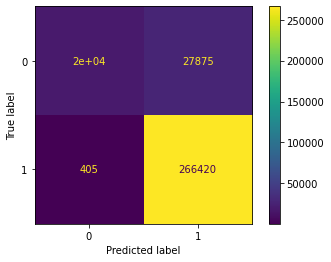

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix
pred = bin.predict(x_test)
roc_gp = roc_auc_score(pred, y_test)
print("The ROC is: {}".format(roc_gp))
resulter = confusion_matrix(y_test, pred)
print("The Confusion matrix is: {}\n\t\t\t\t\t{}".format(resulter[0], resulter[1]))
plot_confusion_matrix(bin, x_test, y_test)

In [ ]:
import pickle
Pkl_Filename = "bin_gp.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(bin, file)

In [ ]:
predictiony = pd.DataFrame(pred)

In [ ]:
predictiony.to_csv('predictions_binary.csv')

In [ ]:
bin.score(x_test, y_test)

0.9101374947172414

In [ ]:
TN, FP = resulter[0,0], resulter[0,1]
FN, TP = resulter[1,0], resulter[1,1]

In [ ]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
accuracy

0.9101374947172414

In [ ]:
precision = TP/(TP+FP)
precision

0.9052821148847245

In [ ]:
recall =  TP/(TP+FN)
recall

0.9984821512227116

In [ ]:
f1 =  (2*precision*recall)/(precision + recall)
f1

0.9496007984031937

In [ ]:
a_b_shuffle.to_csv('pre_split.csv')

In [ ]:
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')

In [ ]:
x.to_csv('x.csv')
y.to_csv('y.csv')

In [ ]:
resulter.sum() - len(y_test)

0

In [ ]:
len(x_test)- len(predictiony)

0

In [ ]:
len(a_b_shuffle)

786756

In [ ]:
!cat /proc/cpuinfo  #To see CPU specs, 

# Real Forest

In [ ]:
!pip install gplearn
import pickle
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, accuracy_score
import sklearn.ensemble as sk_ensemble

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### CODE DONE LOCALLY FOR CREATING RF MODEL
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.ensemble as sk_ensemble
import sklearn.model_selection as sk_model_select
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score



dataset = pd.read_csv('CICIDS2017_RFE_binary_multiclass_balanced.csv')
multiclass = dataset['Label']
binary = dataset['BENIGN']
dataset = dataset.drop(axis=0, columns=['Label', 'BENIGN'])

x_train, x_test, y_train, y_test = sk_model_select.train_test_split(dataset, multiclass, test_size=0.6, random_state=42)

def random_forest():
    n_estimators = 100
    max_depth = 80
    random_forest = sk_ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, verbose=1)

    random_forest.fit(x_train, y_train)
    with open('rf_multi.pkl', 'wb') as f:
        pickle.dump(random_forest, f)
    return random_forest

def full_rf():
    rf_model = random_forest()

    predictions = rf_model.predict(x_test)
    matrix = confusion_matrix(y_test, predictions)
    with open('multi_matrix.txt', 'w') as m:
        m.write(str(matrix))

    print("Accuracy:", accuracy_score(y_test, predictions))
    disp = ConfusionMatrixDisplay(matrix)
    disp.plot()
    plt.show()

full_rf()

# RF best performer
with open('rf_multi.pkl', 'rb') as f:
  rf : sk_ensemble.RandomForestClassifier = pickle.load(f)

rf_predictions = rf.predict(x_test)

multi_labels = [
    'BENIGN',
    'DoS GoldenEye',
    'Bot',
    'Heartbleed',
    'DoS Hulk',
    'FTP-Patator',
    'PortScan',
    'DDoS',
    'Brute Force',
    'XSS',
    'DoS Slowhttptest',
    'Infiltration',
    'SSH-Patator',
    'DoS slowloris',
    'Sql Injection'
]

precision_scores = precision_score(y_test, rf_predictions, labels=multi_labels, average=None)
recall_scores = recall_score(y_test, rf_predictions, labels=multi_labels, average=None)
f1_scores = f1_score(y_test, rf_predictions, labels=multi_labels, average=None)
accuracy = accuracy_score(y_test, rf_predictions)

print(precision_scores)
print(recall_scores)
print(f1_scores)
print(accuracy)

metrics = {label: {} for label in multi_labels}

for i in range(len(multi_labels)):
    metrics[multi_labels[i]]['precision'] = precision_scores[i]
    metrics[multi_labels[i]]['recall'] = recall_scores[i]
    metrics[multi_labels[i]]['f1-score'] = f1_scores[i]
    tabs = '\t'
    if multi_labels[i] == 'Bot' or multi_labels[i] == 'DDoS' or multi_labels[i] == 'XSS':
        tabs += '\t'
    if multi_labels[i] != 'DoS Slowhttptest' and multi_labels[i] != 'DoS GoldenEye' and multi_labels[i] != 'DoS slowloris' and multi_labels[i] != 'Sql Injection':
        tabs += '\t'
    print(multi_labels[i], ':', tabs, metrics[multi_labels[i]])

print(metrics)

In [ ]:
### Get only stuff predicted as attack
data = pd.read_csv('/content/drive/MyDrive/Le_Data/round9/x.csv')
y = data['Label']

# Drop nonsense
x = data.drop(axis=0, columns=['Label', 'Unnamed: 0'])

# Exact same split
x_train, y_train = x[0:int(len(x)*.6)], y[0:int(len(y)*.6)]
x_test, y_test = x[int(len(x)*.6):], y[int(len(y)*.6):]

# RF best performer
with open('/content/drive/MyDrive/Le_Data/rf_multi.pkl', 'rb') as f:
  random_forest = pickle.load(f)

# GP best performer
with open('/content/drive/MyDrive/Le_Data/round9/bin_gp.pkl', 'rb') as f:
  gp_model = pickle.load(f)

p = gp_model.predict(x_test)
### Append p, x_test and y_test together
x_test['prediction'] = p
x_test['label'] = y_test

### Drop all rows where row for p == 0 (benign)
x_test = x_test.drop(x_test[x_test['prediction'] == 0].index)

### Reset y_test to y_test column in combined df and drop columns
y_test = x_test['label']
x_test = x_test.drop(axis=0, columns=['label', 'prediction'])

multi_labels = [
        'BENIGN',
        'DoS GoldenEye',
        'Bot',
        'Heartbleed',
        'DoS Hulk',
        'FTP-Patator',
        'PortScan',
        'DDoS',
        'Brute Force',
        'XSS',
        'DoS Slowhttptest',
        'Infiltration',
        'SSH-Patator',
        'DoS slowloris',
        'Sql Injection'
    ]
### Run prediction
rf_predictions = random_forest.predict(x_test)
matrix = confusion_matrix(
    y_test, 
    rf_predictions,
    labels=multi_labels
)

with open('/content/drive/MyDrive/Le_Data/multi_matrix.txt', 'w') as m:
    m.write(str(matrix))

print("Accuracy:", accuracy_score(y_test, rf_predictions))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_scores = precision_score(y_test, rf_predictions, labels=multi_labels, average=None)
recall_scores = recall_score(y_test, rf_predictions, labels=multi_labels, average=None)
f1_scores = f1_score(y_test, rf_predictions, labels=multi_labels, average=None)
accuracy = accuracy_score(y_test, rf_predictions)

metrics = {label: {} for label in multi_labels}

for i in range(len(multi_labels)):
  metrics[multi_labels[i]]['precision'] = precision_scores[i]
  metrics[multi_labels[i]]['recall'] = recall_scores[i]
  metrics[multi_labels[i]]['f1-score'] = f1_scores[i]

precision_avg = 0
recall_avg = 0
f1_scores_avg = 0
num_labels = len(multi_labels)

for metric in metrics:
  print(metric, ':', metrics[metric])
  precision_avg += metrics[metric]['precision']
  recall_avg += metrics[metric]['recall']
  f1_scores_avg += metrics[metric]['f1-score']

precision_avg /= num_labels
recall_avg /= num_labels
f1_scores_avg /= num_labels

print('accuracy:', accuracy)
print('precision_avg:', precision_avg)
print('recall_avg:', recall_avg)
print('f1 avg:', f1_scores_avg)


BENIGN : {'precision': 0.9806335385077316, 'recall': 0.9991332279610462, 'f1-score': 0.9897969491867864}
DoS GoldenEye : {'precision': 0.9992541951522685, 'recall': 0.9986335403726708, 'f1-score': 0.9989437713575645}
Bot : {'precision': 0.996897913141568, 'recall': 0.9786821705426356, 'f1-score': 0.9877060631461302}
Heartbleed : {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}
DoS Hulk : {'precision': 0.9998478905681287, 'recall': 0.9990663438677249, 'f1-score': 0.9994569644311704}
FTP-Patator : {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}
PortScan : {'precision': 0.9999513358314274, 'recall': 0.9971368952297763, 'f1-score': 0.9985421323743804}
DDoS : {'precision': 0.9999805072025887, 'recall': 0.9995908107792132, 'f1-score': 0.999785621016936}
Brute Force : {'precision': 0.9704192381357736, 'recall': 0.9810671256454389, 'f1-score': 0.9757141328768589}
XSS : {'precision': 0.9815297182098035, 'recall': 0.9671021931871209, 'f1-score': 0.9742625455400165}
DoS Slowhttptest : {'prec